In [1]:
# Import TensorFlow and relevant libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Input
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the paths to the training and testing data directories
train_data_dir = r"F:\Datasets\mnist-jpg\train"
test_data_dir = r"F:\Datasets\mnist-jpg\test"

In [3]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 1000
test_batch_size = 700

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during testing
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [4]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [5]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (1000, 28, 28, 1)
Shape of y_train (1000, 10)
Shape of x_test  (700, 28, 28, 1)
Shape of y_test  (700, 10)


In [6]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2350 - loss: 2.1817 - val_accuracy: 0.3314 - val_loss: 2.0418
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5150 - loss: 1.7763 - val_accuracy: 0.6457 - val_loss: 1.5541
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 1.2873 - val_accuracy: 0.6971 - val_loss: 1.1544
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.9424 - val_accuracy: 0.7471 - val_loss: 0.9183
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.7462 - val_accuracy: 0.7757 - val_loss: 0.7676
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8310 - loss: 0.6280 - val_accuracy: 0.8114 - val_loss: 0.6798
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.5364 - val_accuracy: 0.8100 - val_loss: 0.6368
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.4795 - val_accuracy: 0.

<Axes: >

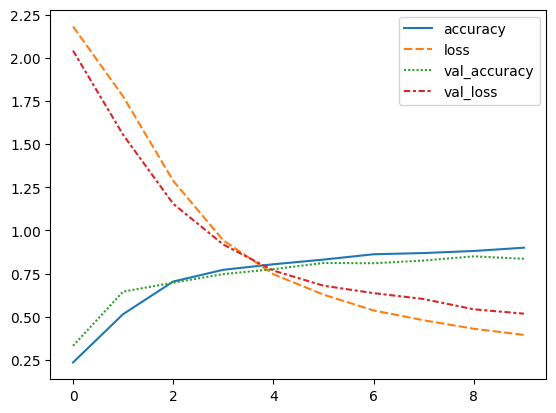

In [8]:
import seaborn as sns
sns.lineplot(model.history.history)

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.5178  
Loss:  0.5178459882736206
Accuracy:  0.8357142806053162


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


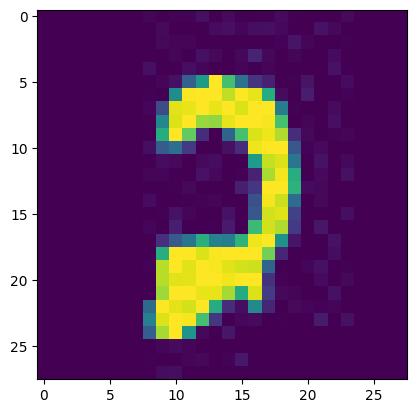

7


In [10]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))